In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


# **Load in Data Frames**

TRAIN_CATEGORICAL.csv      TRAIN_QUANTITATIVE.csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# categorical variable dataframe

file_path_trainC = "/content/drive/My Drive/data_test/TRAIN_CATEGORICAL_METADATA_new.csv"
df1 = pd.read_csv(file_path_trainC)


In [4]:
train_cat = pd.read_csv(file_path_trainC)
train_cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [5]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

In [6]:
# Functional Connection Matrices

file_path_trainFCM = "/content/drive/My Drive/data_test/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv"
train_FCM = pd.read_csv(file_path_trainFCM)
train_FCM.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [7]:
train_FCM.columns

Index(['participant_id', '0throw_1thcolumn', '0throw_2thcolumn',
       '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn',
       '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn',
       '0throw_9thcolumn',
       ...
       '195throw_196thcolumn', '195throw_197thcolumn', '195throw_198thcolumn',
       '195throw_199thcolumn', '196throw_197thcolumn', '196throw_198thcolumn',
       '196throw_199thcolumn', '197throw_198thcolumn', '197throw_199thcolumn',
       '198throw_199thcolumn'],
      dtype='object', length=19901)

In [8]:
print(train_FCM)

     participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0      70z8Q2xdTXM3          0.093473          0.146902          0.067893   
1      WHWymJu6zNZi          0.029580          0.179323          0.112933   
2      4PAQp1M6EyAo         -0.051580          0.139734          0.068295   
3      obEacy4Of68I          0.016273          0.204702          0.115980   
4      s7WzzDcmDOhF          0.065771          0.098714          0.097604   
...             ...               ...               ...               ...   
1208   kTurROKp5YHQ          0.022932          0.024830         -0.006514   
1209   FCRyMz9O6yCq          0.047078          0.135955          0.144366   
1210   vm2P1hmAY1hl          0.094541          0.145280          0.061964   
1211   OFxvN8lnw21w         -0.001533          0.128562          0.045000   
1212   9gpepMI9sj5q         -0.115224          0.147713          0.083183   

      0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolum

In [9]:
# Quantitative variable train dataframe

file_path_trainQ = '/content/drive/My Drive/data_test/TRAIN_QUANTITATIVE_METADATA_new.csv'
train_Quant = pd.read_csv(file_path_trainQ)
train_Quant.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [10]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

In [11]:
# ADHD and Sex solutions dataframe for model training

file_path_trainS = '/content/drive/My Drive/data_test/TRAINING_SOLUTIONS.csv'
train_Solutions = pd.read_csv(file_path_trainS)
train_Solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [12]:
train_Solutions.columns

Index(['participant_id', 'ADHD_Outcome', 'Sex_F'], dtype='object')

# **Exploratory Data Analysis**

Use .info() and .describe() to summarize each dataset.

In [13]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


Understand the distribution of the categorical variables with .value_counts().

In [14]:
# Barratt_Barratt_P2_Occ - Barratt Simplified Measure of Social Status - Parent 2 Occupation
train_cat['Barratt_Barratt_P2_Occ'].value_counts()

# look back at the dictionary to see what category these integers [0, 45, 35] represent.

,count
Barratt_Barratt_P2_Occ,
45.0,239
35.0,195
30.0,149
40.0,116
15.0,86
0.0,65
20.0,41
5.0,38
10.0,37


Notice the parent 2 occupation with the most frequency is 0: homemaker, stay at home parent.

**Visualize distributions:**

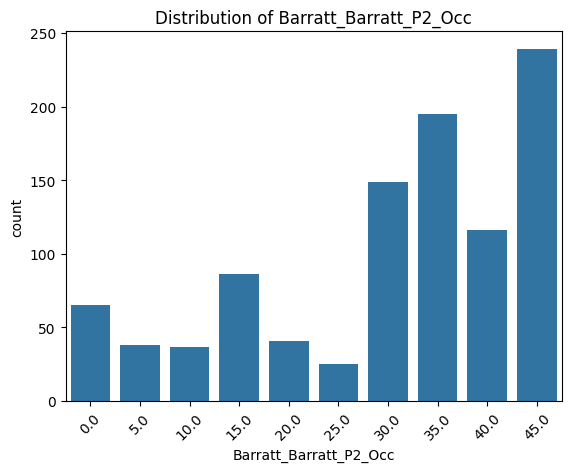

In [15]:
sns.countplot(x='Barratt_Barratt_P2_Occ', data=train_cat[['Barratt_Barratt_P2_Occ']])
plt.title(f"Distribution of Barratt_Barratt_P2_Occ")
plt.xticks(rotation=45)
plt.show()

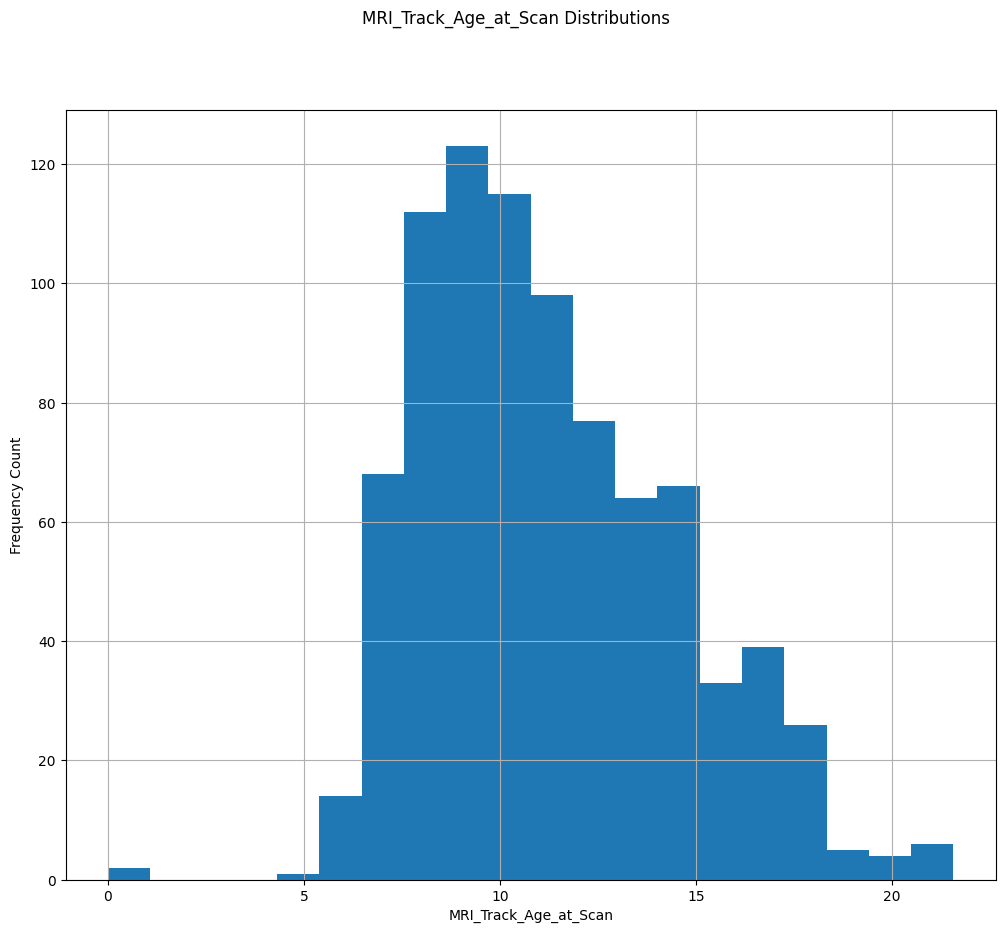

In [16]:
# Distribution of MRI_Track_Age_at_Scan
train_Quant['MRI_Track_Age_at_Scan'].hist(figsize=(12, 10), bins=20)
plt.suptitle("MRI_Track_Age_at_Scan Distributions")
plt.xlabel('MRI_Track_Age_at_Scan')
plt.ylabel('Frequency Count')
plt.show()

In [17]:
# Gender distribution
train_Solutions['Sex_F'].value_counts()

,count
Sex_F,
0,797
1,416


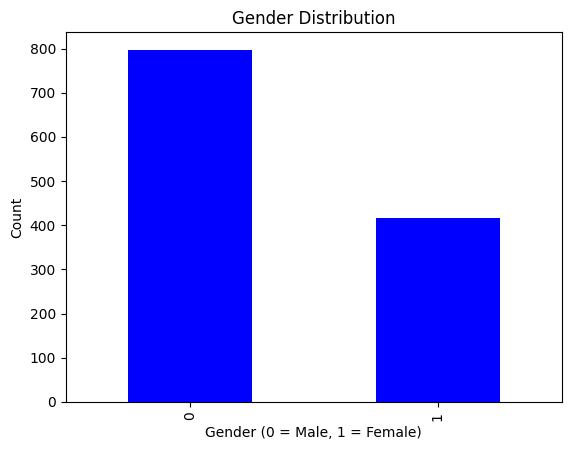

In [18]:
train_Solutions['Sex_F'].value_counts().plot(kind='bar', color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.show()

In [19]:
# ADHD distribution
train_Solutions['ADHD_Outcome'].value_counts()

,count
ADHD_Outcome,
1,831
0,382


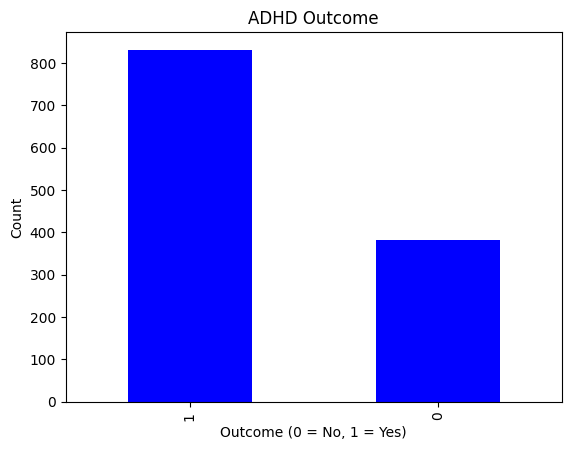

In [20]:
train_Solutions['ADHD_Outcome'].value_counts().plot(kind='bar', color='blue')
plt.title('ADHD Outcome')
plt.xlabel('Outcome (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Testing Predictiveness

In [21]:
train_Quant.columns

Index(['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score',
       'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV',
       'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP',
       'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total',
       'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing',
       'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity',
       'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial',
       'MRI_Track_Age_at_Scan'],
      dtype='object')

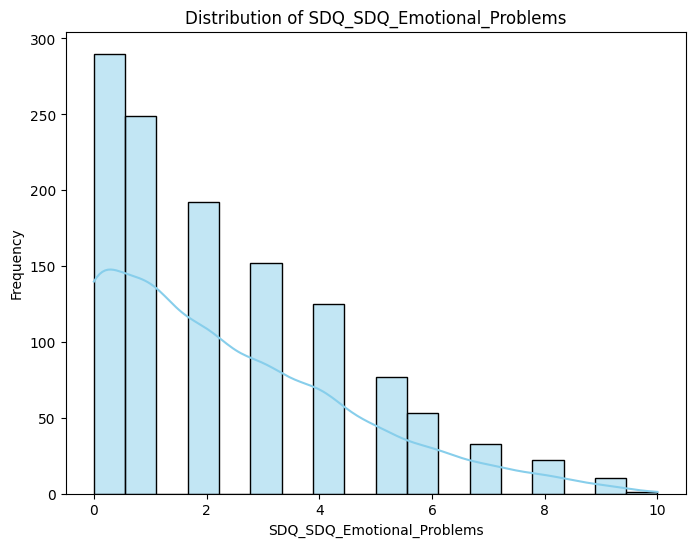

In [22]:
# Plot the distribution of the SDQ_SDQ_Emotional_Problems variable
plt.figure(figsize=(8, 6))
sns.histplot(train_Quant['SDQ_SDQ_Emotional_Problems'], kde=True, color='skyblue')
plt.title('Distribution of SDQ_SDQ_Emotional_Problems')
plt.xlabel('SDQ_SDQ_Emotional_Problems')
plt.ylabel('Frequency')
plt.show()

This boxplot examines the relationship between `SDQ_SDQ_Emotional_Problems` and `ADHD_outcome` (as a target variable).

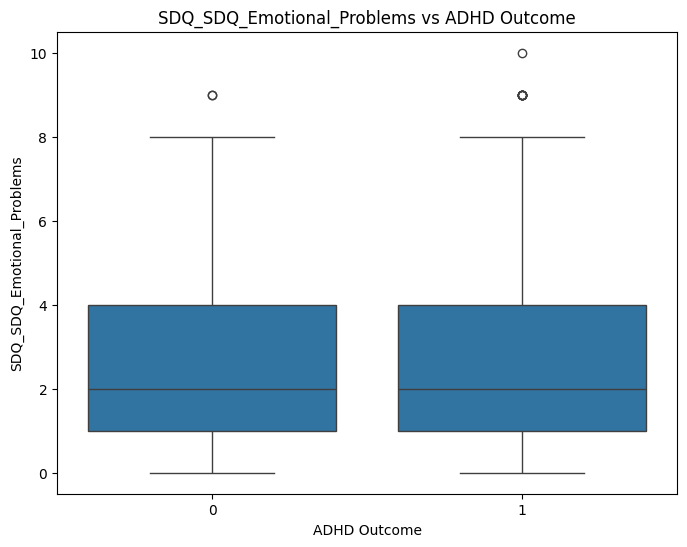

In [23]:
# Check for correlation with ADHD outcome
train_Quant_copy = train_Quant.copy()
train_Quant_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

plt.figure(figsize=(8, 6))
sns.boxplot(x='ADHD_Outcome', y='SDQ_SDQ_Emotional_Problems', data=train_Quant_copy)
plt.title('SDQ_SDQ_Emotional_Problems vs ADHD Outcome')
plt.xlabel('ADHD Outcome')
plt.ylabel('SDQ_SDQ_Emotional_Problems')
plt.show()

The boxplot reveals that individuals diagnosed with ADHD tend to have a higher median on the SDQ Emotional Problems scale compared to non-ADHD individuals. Additionally, the boxplot for the ADHD group displays greater variability, as evidenced by its extended range. This suggests that emotional problems are not only more pronounced but also more diverse within the ADHD group.

In [24]:
train_cat.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

Let's look at `Barratt_Barratt_P1_Edu` which indicates the Parent 1 level of education

- 3=Less than 7th grade
- 6=Junior high/Middle school (9th grade)
- 9=Partial high school (10th or 11th grade)
- 12=High school graduate
- 15=Partial college (at least one year)
- 18=College education
- 21=Graduate degree

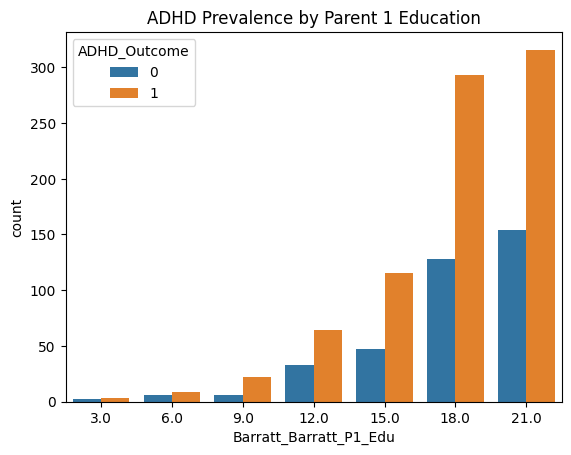

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_cat, x='Barratt_Barratt_P1_Edu', hue=train_Solutions['ADHD_Outcome'])
plt.title('ADHD Prevalence by Parent 1 Education')
plt.show()

In [26]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

,count
Barratt_Barratt_P1_Edu,
21.0,470
18.0,421
15.0,162
12.0,97
9.0,28
6.0,15
3.0,5


Most of the data points fall into a specific category (e.g., 21 has 470 entries out of a total 1213). This means that even if ADHD prevalence appears higher in this category, it might just reflect that there are more people in this group overall, rather than an actual trend.

To adress this, normalize the data or compute percentages within each category to account for differences in group sizes. Let's compute ADHD percentage for each category.

In [27]:
# Add ADHD_Outcome directly to a copy of the train_cat dataset for grouping
train_cat_copy = train_cat.copy()
train_cat_copy['ADHD_Outcome'] = train_Solutions['ADHD_Outcome']

adhd_percentages = train_cat_copy.groupby('Barratt_Barratt_P1_Edu')['ADHD_Outcome'].mean()
print(adhd_percentages)

Barratt_Barratt_P1_Edu
3.0     0.600000
6.0     0.600000
9.0     0.785714
12.0    0.659794
15.0    0.709877
18.0    0.695962
21.0    0.672340
Name: ADHD_Outcome, dtype: float64


Categories like 3 - Less than 7th grade (80%) and 12 - High school graduate (72%) show some of the highest proportions of ADHD outcomes. Categories 21 - Graduate degree (67.2%) have relatively lower ADHD proportions compared to middle education levels.

In [28]:
train_cat['Barratt_Barratt_P1_Edu'].value_counts()

,count
Barratt_Barratt_P1_Edu,
21.0,470
18.0,421
15.0,162
12.0,97
9.0,28
6.0,15
3.0,5


### One Hot Encoding

In [29]:
for col in train_cat.select_dtypes(include='int').columns:
    train_cat[col] = train_cat[col].astype('category')

In [30]:
# Creating a list of all of the columns except the first
columns_to_encode = train_cat.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_to_encode)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [31]:
# encoding categorical data
train_encoded = pd.get_dummies(train_cat[columns_to_encode], drop_first=True)
train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

<ipython-input-31-1d15a0192691>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [32]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([train_cat.drop(columns=columns_to_encode), train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4
0,00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,0,1,0,0,0,1
1,00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,0,0,0,0,0,0
2,04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,0,0,0,0,0,0
3,05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,1,0,0,0,0,0
4,06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,1,0,0,0,0,0


### Train and Test Dataframs

In [33]:
# load in test categorical dataframe

# file_path_testC = "/content/drive/My Drive/data_test/TEST_CATEGORICAL.csv"
# test_cat = pd.read_csv(file_path_testC)
# #(test_cat.head()

file_path_testC = "/content/drive/My Drive/data_test/TEST_CATEGORICAL.xlsx"
test_cat = pd.read_excel(file_path_testC)
#test_cat = df.to_csv('TEST_CATEGORICAL.csv')

In [34]:
# convert our int variables to categories
for col in test_cat.select_dtypes(include='int').columns:
    test_cat[col] = test_cat[col].astype('category')

# Encode categorical variables in test
test_encoded = pd.get_dummies(test_cat[columns_to_encode], drop_first=True)
test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Ensure test_encoded has the same columns as train_encoded
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([test_cat.drop(columns=columns_to_encode), test_encoded], axis=1)

cat_test_final.head()

<ipython-input-34-bd9c2ff2a55a>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4
0,Cfwaf5FX7jWK,0.0,0.0,0,21.0,30.0,18.0,30.0,0,0,0,0,0,0,0,0
1,vhGrzmvA3Hjq,0.0,0.0,0,21.0,45.0,NaN,30.0,0,0,0,0,0,0,0,0
2,ULliyEXjy4OV,0.0,0.0,0,21.0,40.0,18.0,40.0,0,0,0,0,0,0,0,0
3,LZfeAb1xMtql,0.0,0.0,0,21.0,45.0,21.0,45.0,0,0,0,0,0,0,0,0
4,EnFOUv0YK1RG,2.0,0.0,0,18.0,0.0,21.0,45.0,0,0,0,0,0,0,0,0


### Merging Data Frame

In [35]:
train_cat_FCM = pd.merge(cat_train_final, train_FCM, on = 'participant_id')

In [36]:
train_df = pd.merge(train_cat_FCM, train_Quant, on = 'participant_id')

# ensure it looks accurate
train_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,1.0,0.0,3.0,21.0,45.0,NaN,NaN,0,0,...,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,0.0,9.0,2.0,21.0,0.0,21.0,45.0,0,1,...,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,1.0,2.0,2.0,9.0,0.0,NaN,NaN,0,1,...,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,3.0,8.0,2.0,18.0,10.0,18.0,0.0,0,0,...,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.0,1.0,2.0,12.0,0.0,NaN,NaN,0,0,...,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


## Merge test dataframes

In [37]:
file_path_testFCM = "/content/drive/My Drive/data_test/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"
test_FCM = pd.read_csv(file_path_testFCM)
#print(train_FCM.head())

file_path_testQ = "/content/drive/My Drive/data_test/TEST_QUANTITATIVE_METADATA.xlsx"
test_Quant = pd.read_excel(file_path_testQ)
#print(train_Quant.head())

test_cat_FCM = pd.merge(cat_test_final, test_FCM, on = 'participant_id')

test_df = pd.merge(test_cat_FCM, test_Quant, on = 'participant_id')

# ensure it looks accurate
test_df.head()

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,0.0,0.0,0,21.0,30.0,18.0,30.0,0,0,...,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,0.0,0.0,0,21.0,45.0,NaN,30.0,0,0,...,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,0.0,0.0,0,21.0,40.0,18.0,40.0,0,0,...,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,0.0,0.0,0,21.0,45.0,21.0,45.0,0,0,...,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,2.0,0.0,0,18.0,0.0,21.0,45.0,0,0,...,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


### NA Values

In [38]:
# check how many NA values we have
print(train_df.isna().sum())

# 371 NANs values
# 360 in MRI_Track_age_at_Scan
# 11 in PreInt_Demos_Fam_Child_Ethnicity

participant_id                        0
PreInt_Demos_Fam_Child_Ethnicity     43
PreInt_Demos_Fam_Child_Race          54
MRI_Track_Scan_Location               3
Barratt_Barratt_P1_Edu               15
                                   ... 
SDQ_SDQ_Hyperactivity                 9
SDQ_SDQ_Internalizing                 9
SDQ_SDQ_Peer_Problems                 9
SDQ_SDQ_Prosocial                     9
MRI_Track_Age_at_Scan               360
Length: 19934, dtype: int64


In [39]:
train_df.fillna({'MRI_Track_Age_at_Scan':train_df['MRI_Track_Age_at_Scan'].mean()}, inplace = True)
train_df.fillna({'PreInt_Demos_Fam_Child_Ethnicity':train_df['PreInt_Demos_Fam_Child_Ethnicity'].mean()}, inplace = True)

print(train_df.isna().sum().sum()) # should now be zero

712


In [40]:
train_df.ffill(inplace=True)
print(train_df.isna().sum().sum())

2


In [41]:
# Fill NAs of test data

for col in test_df.columns:
    if test_df[col].isna().sum() > 0:  # Check if the column has NaN values
        if test_df[col].dtype in ['float64', 'int64']:  # Ensure it's numeric
            test_df[col] = test_df[col].fillna(test_df[col].mean())  # Avoid inplace
        else:
            print(f"Skipping non-numeric column: {col}")

In [42]:
# Identify continuous numeric columns (exclude one-hot encoded/binary columns)
continuous_cols = [
    col for col in train_df.select_dtypes(include=['float64', 'int64']).columns
    if train_df[col].nunique() > 2
]

print("Continuous columns to process:", continuous_cols)

Continuous columns to process: ['PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ', '0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn', '0throw_5thcolumn', '0throw_6thcolumn', '0throw_7thcolumn', '0throw_8thcolumn', '0throw_9thcolumn', '0throw_10thcolumn', '0throw_11thcolumn', '0throw_12thcolumn', '0throw_13thcolumn', '0throw_14thcolumn', '0throw_15thcolumn', '0throw_16thcolumn', '0throw_17thcolumn', '0throw_18thcolumn', '0throw_19thcolumn', '0throw_20thcolumn', '0throw_21thcolumn', '0throw_22thcolumn', '0throw_23thcolumn', '0throw_24thcolumn', '0throw_25thcolumn', '0throw_26thcolumn', '0throw_27thcolumn', '0throw_28thcolumn', '0throw_29thcolumn', '0throw_30thcolumn', '0throw_31thcolumn', '0throw_32thcolumn', '0throw_33thcolumn', '0throw_34thcolumn', '0throw_35thcolumn', '0throw_36thcolumn', '0throw_37thcolumn', '0

In [43]:
# Outlier Handling: Cap values at the 1st and 99th percentiles
for col in continuous_cols:
    lower_bound = train_df[col].quantile(0.01)
    upper_bound = train_df[col].quantile(0.99)
    train_df[col] = train_df[col].clip(lower_bound, upper_bound)

    # For the test set, use the training set's quantiles to ensure consistency
    if col in test_df.columns:
        test_df[col] = test_df[col].clip(lower_bound, upper_bound)

In [44]:
# Normalization: Scale the continuous features with StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on training continuous columns and transform them
train_df[continuous_cols] = scaler.fit_transform(train_df[continuous_cols])

# Use the same scaler (fitted on train) to transform the test set
test_df[continuous_cols] = scaler.transform(test_df[continuous_cols])

# Summary of the scaled data:
print("After scaling, summary of a continuous feature:")
print(train_df[continuous_cols[0]].describe())

After scaling, summary of a continuous feature:
count    1.213000e+03
mean    -1.464433e-17
std      1.000412e+00
min     -6.405683e-01
25%     -6.405683e-01
50%     -6.405683e-01
75%      8.289708e-01
max      3.768049e+00
Name: PreInt_Demos_Fam_Child_Ethnicity, dtype: float64


In [45]:
train_df.head(10)

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,0.828971,-0.679169,0.939799,0.902282,1.154901,NaN,NaN,0,0,...,0.467790,0.741682,0.778324,0.822754,0.316340,0.870779,0.400363,-0.132215,0.605204,1.157189
1,00fV0OyyoLfw,-0.640568,2.152952,-0.393506,0.902282,-1.536828,1.048290,1.071654,0,1,...,1.470315,1.207103,0.778324,1.309347,0.316340,0.870779,0.687724,0.349397,0.123187,0.001376
2,04X1eiS79T4B,0.828971,-0.049809,-0.393506,-2.583284,-1.536828,1.048290,1.071654,0,1,...,0.467790,1.827665,2.177002,0.579458,2.094472,0.515018,2.699252,2.275843,-0.358831,0.847766
3,05ocQutkURd6,3.768049,1.838271,-0.393506,0.030890,-0.938666,0.285668,-2.175458,0,0,...,-1.035997,-1.120004,-1.086579,-1.123615,-1.461792,-0.908027,-0.749082,-0.132215,-0.840849,-0.637175
4,06YUNBA9ZRLq,-0.640568,-0.364489,-0.393506,-1.711893,-1.536828,0.285668,-2.175458,0,0,...,1.971577,1.672525,2.177002,1.795939,1.383220,1.226541,0.975085,-0.613826,-1.804884,-1.750827
5,0cduHhwrQN4r,-0.640568,-0.679169,-0.393506,0.030890,-0.041423,-0.476953,0.710864,0,1,...,1.971577,1.517384,-0.620353,2.039235,0.316340,1.582302,0.400363,1.312620,-0.840849,0.001376
6,0FUWCjn9YMN1,-0.640568,-0.364489,-0.393506,-0.840501,-1.536828,-0.476953,-0.010717,0,1,...,-0.534735,-0.654583,-0.620353,-0.393727,-1.461792,-0.196505,-0.749082,-0.613826,-0.358831,0.627248
7,0Hthz5IFXhpw,-0.640568,-0.364489,-1.726812,-1.711893,0.556739,0.285668,0.710864,1,0,...,-0.033473,0.431401,0.312098,0.092866,0.316340,0.159257,0.687724,0.831008,-1.322866,0.001376
8,0hzWGU6XYSVp,-0.640568,-0.679169,0.939799,0.902282,1.154901,1.048290,1.071654,0,0,...,-0.033473,0.896822,1.710776,-0.637023,-0.039286,-0.908027,2.411891,2.275843,-0.840849,0.474822
9,0i2Tz2XUL4vm,-0.640568,-0.679169,-0.393506,-0.840501,1.154901,-2.002196,1.071654,0,0,...,0.467790,0.431401,0.778324,0.822754,-0.039286,0.870779,-0.174359,-1.095438,0.123187,-0.582623


In [46]:
test_df.head(10)

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,-0.640568,-0.679169,-1.726812,0.902282,0.257658,0.285668,-0.010717,0,0,...,-0.033473,-0.034021,0.312098,0.336162,-0.750539,0.515018,-0.461720,-1.095438,0.123187,-0.858434
1,vhGrzmvA3Hjq,-0.640568,-0.679169,-1.726812,0.902282,1.154901,0.402338,-0.010717,0,0,...,-0.033473,0.586541,2.643228,-0.637023,1.027593,-0.908027,1.837169,0.349397,0.605204,0.412955
2,ULliyEXjy4OV,-0.640568,-0.679169,-1.726812,0.902282,0.855820,0.285668,0.710864,0,0,...,-0.534735,-0.809723,-0.620353,-0.393727,-1.106165,-0.196505,-1.036443,-1.095438,0.605204,-1.324767
3,LZfeAb1xMtql,-0.640568,-0.679169,-1.726812,0.902282,1.154901,1.048290,1.071654,0,0,...,0.969052,0.431401,0.778324,0.579458,1.383220,0.159257,0.113002,-0.613826,-0.840849,-0.739358
4,EnFOUv0YK1RG,2.298510,-0.679169,-1.726812,0.030890,-1.536828,1.048290,1.071654,0,0,...,-0.033473,0.896822,1.710776,1.066051,0.316340,1.582302,0.400363,-1.095438,1.087222,-1.137598
5,3VbkvJ22j9Fu,-0.640568,-0.364489,-1.726812,0.902282,1.154901,0.285668,1.071654,0,0,...,-0.088355,-0.067993,0.027939,-0.034998,-0.058755,0.011239,-0.086263,-0.172642,-0.008752,1.015822
6,PRKZcnOgqcuk,0.828971,-0.049809,-1.726812,0.902282,0.855820,1.048290,1.071654,0,0,...,-0.534735,-0.964864,-0.620353,-0.637023,-1.461792,-0.552266,-1.036443,-1.095438,0.605204,-0.928661
7,DuVUuyMZi5qV,0.828971,-0.679169,-1.726812,-3.454675,-1.536828,-2.002196,-1.453877,0,0,...,-1.035997,-1.120004,-0.620353,-1.366911,-0.394912,-1.263788,-0.461720,-0.132215,1.087222,-0.525327
8,uM4etVLZrgMg,0.828971,-0.049809,-1.726812,0.030890,0.855820,0.285668,-1.814668,0,0,...,-0.088355,-0.067993,0.027939,-0.034998,-0.058755,0.011239,-0.086263,-0.172642,-0.008752,-1.421856
9,BpzyExrET5ta,-0.640568,-0.679169,-1.726812,0.030890,-0.041423,1.048290,1.071654,0,0,...,0.467790,1.517384,2.177002,0.579458,1.383220,0.515018,2.124530,1.312620,1.087222,1.982664


# Perform Machine Learning

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [48]:
file_path_trainS = '/content/drive/My Drive/data_test/TRAINING_SOLUTIONS.csv'
train_Solutions = pd.read_csv(file_path_trainS)

In [49]:
train_Solutions.head(10)

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1
5,tBGXkEdv2cp7,1,0
6,DgRP31gu21O9,1,0
7,ClMA0FwvFgLY,1,0
8,NVUkahaJ6fhf,1,1
9,u0JiZgdGuYvh,1,0


In [50]:
train_df = train_df.merge(train_Solutions[['participant_id', 'ADHD_Outcome', 'Sex_F']], on='participant_id')

In [51]:
train_df

,participant_id,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,0.828971,-0.679169,0.939799,0.902282,1.154901,NaN,NaN,0,0,...,0.778324,0.822754,0.316340,0.870779,0.400363,-0.132215,0.605204,1.157189,1,0
1,00fV0OyyoLfw,-0.640568,2.152952,-0.393506,0.902282,-1.536828,1.048290,1.071654,0,1,...,0.778324,1.309347,0.316340,0.870779,0.687724,0.349397,0.123187,0.001376,1,0
2,04X1eiS79T4B,0.828971,-0.049809,-0.393506,-2.583284,-1.536828,1.048290,1.071654,0,1,...,2.177002,0.579458,2.094472,0.515018,2.699252,2.275843,-0.358831,0.847766,0,1
3,05ocQutkURd6,3.768049,1.838271,-0.393506,0.030890,-0.938666,0.285668,-2.175458,0,0,...,-1.086579,-1.123615,-1.461792,-0.908027,-0.749082,-0.132215,-0.840849,-0.637175,0,1
4,06YUNBA9ZRLq,-0.640568,-0.364489,-0.393506,-1.711893,-1.536828,0.285668,-2.175458,0,0,...,2.177002,1.795939,1.383220,1.226541,0.975085,-0.613826,-1.804884,-1.750827,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zwjJWCRzKhDz,0.828971,-0.364489,0.939799,-1.711893,0.556739,-0.476953,-1.814668,0,0,...,1.244550,1.309347,0.316340,0.870779,0.687724,-0.132215,0.123187,0.011798,0,1
1209,zwXD5v17Rx01,-0.640568,-0.679169,0.939799,0.902282,0.855820,1.048290,0.710864,0,0,...,-1.086579,-0.637023,-1.461792,-0.908027,-1.323804,-1.095438,-0.358831,-1.480066,1,0
1210,zWzLCi3NTBTd,2.298510,0.264871,0.939799,0.902282,0.855820,1.048290,0.350074,0,0,...,0.312098,0.336162,-0.394912,0.515018,0.113002,-0.132215,0.605204,-0.488494,1,1
1211,Zy9GTHDxUbXU,-0.640568,-0.364489,0.939799,0.030890,0.556739,0.285668,1.071654,0,0,...,-1.086579,0.092866,0.316340,0.515018,-0.749082,-0.132215,-0.358831,0.001376,1,0


In [ ]:
train_drop_df = train_df.drop(columns=['participant_id'])
test_drop_df = test_df.drop(columns=['participant_id'])

x = train_drop_df.drop(columns=['ADHD_Outcome', 'Sex_F'])
y = train_drop_df[['ADHD_Outcome', 'Sex_F']]

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Options: "median", "most_frequent", "constant"
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)  # Use same imputer for validation/test set

In [56]:
print(pd.DataFrame(X_train).isna().sum().sum())  # Should print 0


0


In [57]:
model = LogisticRegression(max_iter=1000, random_state=42)
multi_target_model = MultiOutputClassifier(model)
multi_target_model.fit(X_train, y_train)

y_pred = multi_target_model.predict(X_val)


In [58]:
accuracy_adhd = accuracy_score(y_val['ADHD_Outcome'], y_pred[:, 0])  # ADHD_Outcome accuracy
accuracy_sex = accuracy_score(y_val['Sex_F'], y_pred[:, 1])  # Sex_F accuracy

print(f"Validation Accuracy for ADHD_Outcome: {accuracy_adhd:.4f}")
print(f"Validation Accuracy for Sex_F: {accuracy_sex:.4f}")
print("\nClassification Report (ADHD_Outcome):\n", classification_report(y_val['ADHD_Outcome'], y_pred[:, 0]))
print("\nClassification Report (Sex_F):\n", classification_report(y_val['Sex_F'], y_pred[:, 1]))
print("\nConfusion Matrix (ADHD_Outcome):\n", confusion_matrix(y_val['ADHD_Outcome'], y_pred[:, 0]))
print("\nConfusion Matrix (Sex_F):\n", confusion_matrix(y_val['Sex_F'], y_pred[:, 1]))


Validation Accuracy for ADHD_Outcome: 0.7284
Validation Accuracy for Sex_F: 0.5103

Classification Report (ADHD_Outcome):
               precision    recall  f1-score   support

           0       0.68      0.27      0.39        77
           1       0.74      0.94      0.83       166

    accuracy                           0.73       243
   macro avg       0.71      0.61      0.61       243
weighted avg       0.72      0.73      0.69       243


Classification Report (Sex_F):
               precision    recall  f1-score   support

           0       0.98      0.30      0.46       168
           1       0.39      0.99      0.55        75

    accuracy                           0.51       243
   macro avg       0.68      0.64      0.51       243
weighted avg       0.80      0.51      0.49       243


Confusion Matrix (ADHD_Outcome):
 [[ 21  56]
 [ 10 156]]

Confusion Matrix (Sex_F):
 [[ 50 118]
 [  1  74]]


In [59]:
test_predictions = multi_target_model.predict(test_drop_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [60]:
submission = pd.DataFrame({
    'participant_id': test_df['participant_id'],
    'ADHD_Outcome': test_predictions[:, 0],
    'Sex_F': test_predictions[:, 1]
})

In [61]:
submission.to_csv("submission.csv", index=False)